In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

start_date = "2012-12-02"
end_date = "2019-12-11"

spy = get_pricing("spy", start_date = start_date, end_date = end_date, fields= "price").resample('w').last().pct_change()[1:]
acwi = get_pricing("qqq", start_date = start_date, end_date = end_date, fields= "price").resample('w').last().pct_change()[1:]
ief = get_pricing("ief", start_date = start_date, end_date = end_date, fields= "price").resample('w').last().pct_change()[1:].fillna(0.0006)
#spy = get_pricing("spy", start_date = start_date, end_date = end_date, fields= "price", frequency = 'daily').pct_change()[1:]
#acwi = get_pricing("qqq", start_date = start_date, end_date = end_date, fields= "price", frequency = 'daily').pct_change()[1:]
#ief = get_pricing("ief", start_date = start_date, end_date = end_date, fields= "price", frequency = 'daily').pct_change()[1:].fillna(0.0006)

ief[100:].mean()

0.0006139386909910052

In [11]:
len(spy)

366

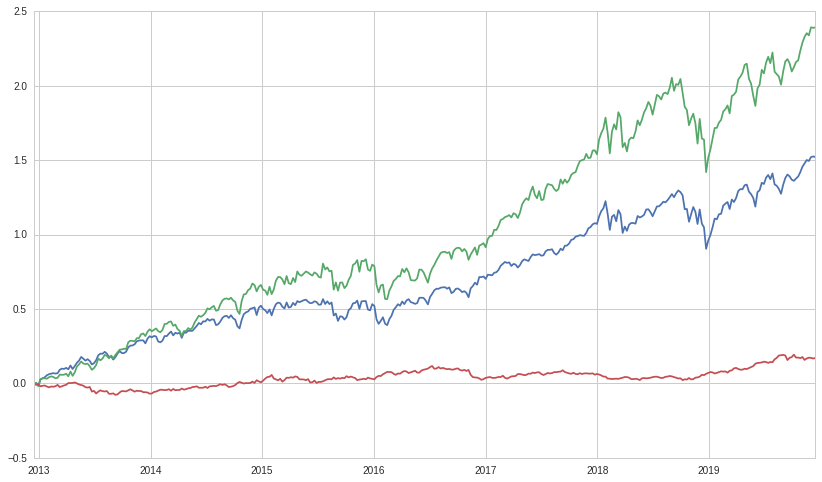

In [12]:
spy_hold = np.cumprod(1+spy)-1
acwi_hold = np.cumprod(1+acwi)-1
ief_hold = np.cumprod(1+ief)-1


plt.plot(spy_hold)
plt.plot(acwi_hold)
plt.plot(ief_hold)

In [13]:
position2 = np.zeros(np.shape(spy))
buy2 = np.zeros(np.shape(spy))
returns2 = np.zeros(np.shape(spy))
log2 = []
for i in range(13, len(spy)-1):
    if np.prod(1+spy[i-12:i]) > np.prod(1+spy[i-13:i-1]):
        if np.prod(1+spy[i-12:i]) > np.prod(1+acwi[i-12:i]):
            returns2[i] = ief[i]
            log2.append(1)#ief bar chart
        else:
            if np.prod(1+acwi[i-12:i]) > np.prod(1+acwi[i-13:i-1]):
                returns2[i] = acwi[i]
                log2.append(2)
            else:
                returns2[i] = ief[i]
                log2.append(1)
    else:
        if np.prod(1+spy[i-12:i]) > np.prod(1+acwi[i-12:i]):
            returns2[i] = acwi[i]
            log2.append(2)#ief bar chart
        else:
            if np.prod(1+acwi[i-12:i]) > np.prod(1+acwi[i-13:i-1]):
                returns2[i] = (0.5*spy[i]) + (0.5 * ief[i])
                log2.append(3)
            else:
                returns2[i] = spy[i]
                log2.append(3)
        

0.0592517694641
0.0629940196459


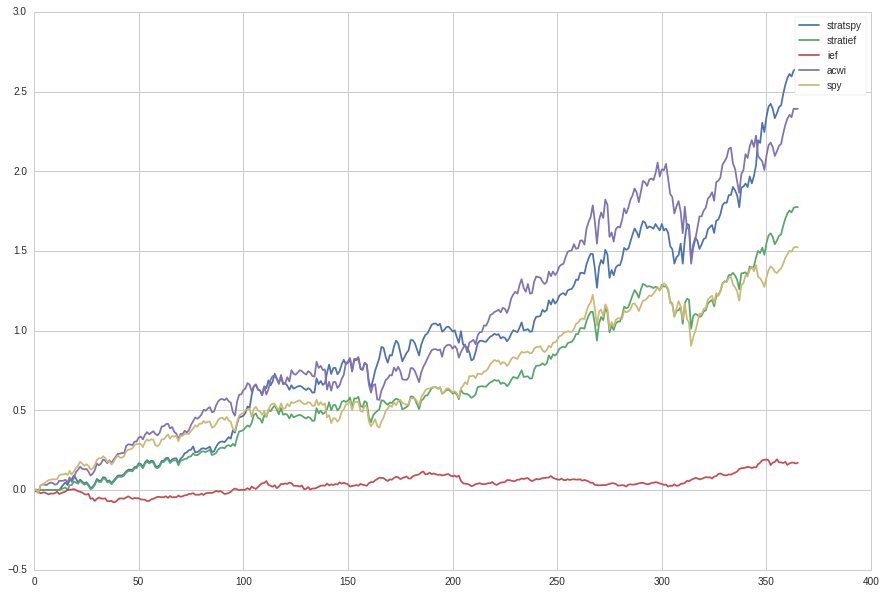

In [42]:
position = np.zeros(np.shape(spy))
buy = np.zeros(np.shape(spy))
returns = np.zeros(np.shape(spy))
log = []
for i in range(13, len(spy)-1):
    if np.prod(1+spy[i-12:i]) > np.prod(1+spy[i-13:i-1]):
        if np.prod(1+spy[i-12:i]) > np.prod(1+acwi[i-12:i]):
            returns[i] = 3*ief[i]
            log.append(1)#ief bar chart
        else:
            if np.prod(1+acwi[i-12:i]) > np.prod(1+acwi[i-13:i-1]):
                returns[i] = acwi[i]
                log.append(2)
            else:
                returns[i] = 3*ief[i]
                log.append(1)
    else:
        if np.prod(1+spy[i-12:i]) > np.prod(1+acwi[i-12:i]):
            returns[i] = acwi[i]
            log.append(2)#ief bar chart
        else:
            if np.prod(1+acwi[i-12:i]) > np.prod(1+acwi[i-13:i-1]):
                returns[i] = (0.5*spy[i]) + (0.5 * ief[i])
                log.append(1)
            else:
                returns[i] = spy[i]
                log.append(3)
        

if i == len(spy)-2:
    print(np.prod(1+spy[i-12:i])-1)

    
#returns[i] = position[i] * spy[i]
cum_returns = np.cumprod(1+returns)-1
cum_returns2 = np.cumprod(1+returns2)-1

last = np.prod(1+returns[-13:-1])-1
print(last)
plt.figure(figsize=(15,10))
plt.plot(range(len(cum_returns)),cum_returns)
plt.plot(range(len(cum_returns2)),cum_returns2)

plt.plot(range(len(cum_returns)),ief_hold)

plt.plot(range(len(cum_returns)),acwi_hold)

plt.plot(range(len(cum_returns)),spy_hold)
plt.legend(['stratspy','stratief' , 'ief', 'acwi', 'spy'])

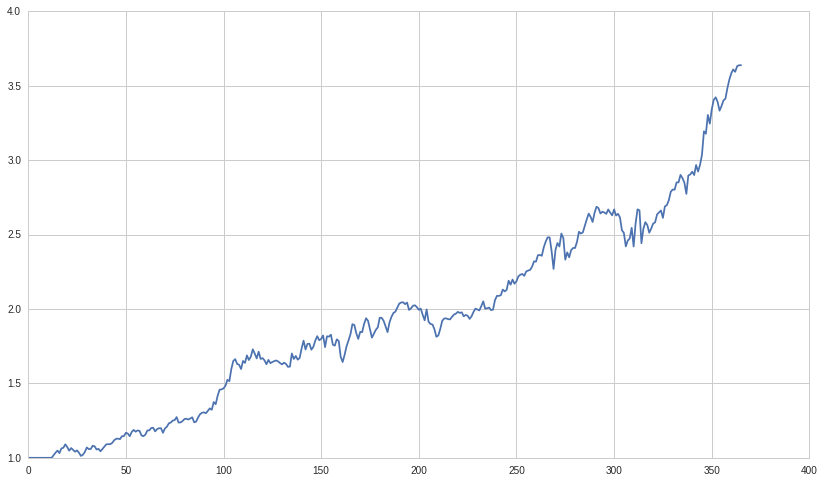

In [41]:
plt.plot(np.cumprod(returns+1))

In [16]:
down= -1*returns[returns<0].mean()
down
(returns.mean()/returns.std())*np.sqrt(52)

1.4159010141444996

In [17]:
float(len(returns[returns>0]))/len(returns)

0.5956284153005464

In [18]:
ireturns.std() * np.sqrt(52)

NameError: name 'ireturns' is not defined

In [19]:
(spy.mean()/spy[spy<0].std())*np.sqrt(52)

1.4261322852358806

In [20]:
spy[spy<0].std()

0.013521218837924558

In [21]:
returns.mean()* 52

0.19313020463152974

(array([  88.,    0.,    0.,    0.,    0.,  155.,    0.,    0.,    0.,  109.]),
 array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ]),
 <a list of 10 Patch objects>)

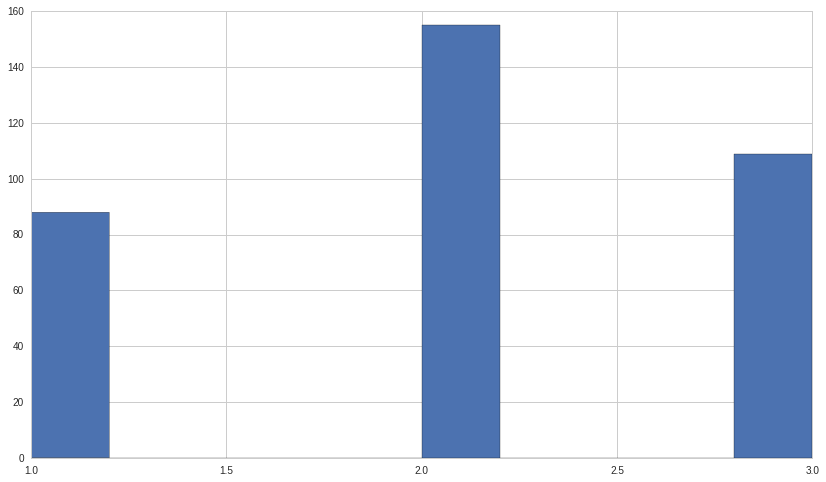

In [22]:
plt.hist(log)

In [23]:
(returns.mean()+1)**52

1.2126068253147722

In [24]:
returns.mean()*52

0.19313020463152974

In [25]:
float(len(returns2[returns2>0]))/len(returns)

0.5956284153005464

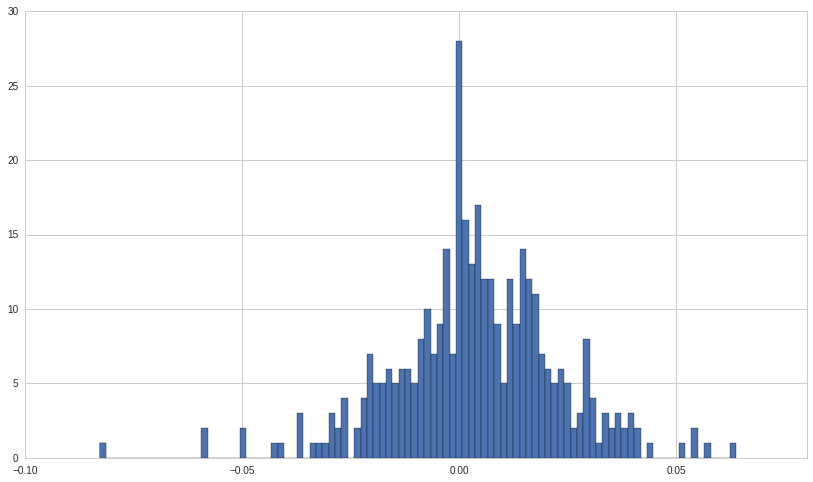

In [26]:
count, ret, h=plt.hist(returns, bins =100)

In [27]:
count = pd.Series(count)
count[count == count.max()].index[0]

56

In [28]:
ret[60]

0.0050791741589602812

In [29]:
(returns.mean()+1)**52

1.2126068253147722

In [30]:
(returns[returns<0].std()+1)**np.sqrt(52)

1.1006810519240882

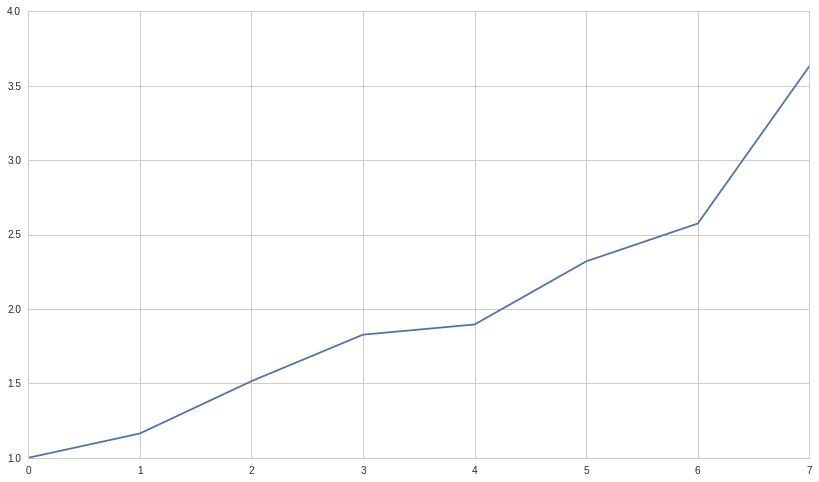

In [31]:
x = []

for i in range(len(returns)):
    if i%52 == 0: 
        x.append(np.prod(1+returns[i-52:i])-1)
x = np.array(x)
plt.plot(np.cumprod(x+1))

In [43]:
plt.plot(x)
len(x)
x = pd.DataFrame(x)
y = pd.read_csv("C:\Users\Olaoluwapo\Desktop\Monthly.csv")

SandboxViolation: Blacklisted attribute within module read_csv You tried to import a module that is not whitelisted on Quantopian. To see the list of allowed modules in the IDE, go to https://www.quantopian.com/docs/whitelists/ide-whitelist#algo-ide-whitelist. To see the list of additional modules allowed in Research, go to https://www.quantopian.com/docs/whitelists/research-whitelist#research-whitelist.

In [44]:
float(len(x[x>0]))/len(x)

0.875

In [45]:
len(x)

8

In [46]:
len(returns)

366

In [47]:
x.max()

0.41077259183681303

In [48]:
returns[returns<0].std()* np.sqrt(52)

0.096570036628671904

In [49]:
x[x>0].std()

0.11405890201007182

In [50]:
x.mean()

0.18168810197136973

In [51]:
change = []
for i in range(1,len(log)):
    if log[i-1] != log[i]:
        change.append(1)

In [52]:
float(len(change))/len(log)

0.5738636363636364

In [53]:
returns[returns>0].mean() * np.sqrt(52)

0.10969402317056462

In [54]:
len(returns)

366

In [55]:
iei

NameError: name 'iei' is not defined

In [56]:
float(len(returns[returns>0]))/len(returns)

0.5956284153005464

In [57]:
(1+returns.mean())**(52)

1.2126068253147722

In [58]:
deposit = 10000
ac = [3000]
rate = 1.4
for i in range(1,10):
    ac.append((ac[i-1]*rate)+deposit*.9)

In [59]:
ac

[3000,
 13200.0,
 27480.0,
 47472.0,
 75460.8,
 114645.12,
 169503.16799999998,
 246304.43519999995,
 353826.2092799999,
 504356.6929919998]

In [60]:
deposit = 10000
ac = [10000]
rate = 1.08
for i in range(1,10):
    ac.append((ac[i-1]*rate)+deposit+1000)

In [61]:
ac

[10000,
 21800.0,
 34544.0,
 48307.520000000004,
 63172.121600000006,
 79225.89132800001,
 96563.96263424002,
 115289.07964497923,
 135512.20601657758,
 157353.1824979038]